In [2]:
import os
import json
import numpy as np

def calculate_mean_performance():
    results = {}
    
    # Traverse all folders starting with 'results'
    for root, dirs, files in os.walk('.'):
        if root.startswith('./results'):
            # Extract model name from folder name
            model_name = root.split('results_')[1].split('_filtered')[0]
            
            performance_data = {
                'mse_train': [], 'mae_train': [], 'r2_train': [],
                'mse_test': [], 'mae_test': [], 'r2_test': []
            }
            
            # Read all JSON files in the folder
            for file in files:
                if file.endswith('.json'):
                    with open(os.path.join(root, file), 'r') as f:
                        data = json.load(f)
                        for key in performance_data.keys():
                            if key in data:
                                performance_data[key].append(data[key])
            
            # Calculate mean performance
            mean_performance = {}
            for key, values in performance_data.items():
                if values:
                    mean_performance[key] = np.mean(values)
            
            # Store results
            if mean_performance:
                results[model_name] = mean_performance
    
    return results

# Call the function and print results
mean_performance = calculate_mean_performance()
for model, performance in mean_performance.items():
    print(f"Model: {model}")
    for metric, value in performance.items():
        print(f"  {metric}: {value:.4f}")
    print()

Model: EHC
  mse_train: 2020175.3784
  mae_train: 757.8439
  r2_train: 0.7936
  mse_test: 2141672.9531
  mae_test: 791.3236
  r2_test: 0.7983

Model: AFP
  mse_train: 1459195.9861
  mae_train: 680.1595
  r2_train: 0.8487
  mse_test: 1829115.4130
  mae_test: 713.3884
  r2_test: 0.8250

Model: filtered_blac_box/663_rabe_266
  mse_train: 7.6291
  mae_train: 2.0274
  r2_train: 0.9973
  mse_test: 19.0161
  mae_test: 3.0440
  r2_test: 0.9922

Model: rf
  mse_train: 8827861.4348
  mae_train: 1215.0112
  r2_train: 0.0926
  mse_test: 10478831.0318
  mae_test: 1355.0643
  r2_test: 0.0605

Model: XGB
  mse_train: 2144270.4724
  mae_train: 533.5807
  r2_train: 0.7846
  mse_test: 2436524.0925
  mae_test: 608.1955
  r2_test: 0.7704

Model: GPGOMEA
  mse_train: 714380.3277
  mae_train: 413.8510
  r2_train: 0.9280
  mse_test: 7783698.3115
  mae_test: 575.7877
  r2_test: 0.3972

Model: SBP
  mse_train: 181318.1758
  mae_train: 269.3250
  r2_train: 0.9844
  mse_test: 617685.8764
  mae_test: 430.5786
  r

In [3]:
mean_performance

{'EHC': {'mse_train': 2020175.3783611164,
  'mae_train': 757.843902403418,
  'r2_train': 0.7936077552511419,
  'mse_test': 2141672.9530973965,
  'mae_test': 791.3236033267304,
  'r2_test': 0.798273684987531},
 'AFP': {'mse_train': 1459195.9861222631,
  'mae_train': 680.1594824860533,
  'r2_train': 0.8486702921110257,
  'mse_test': 1829115.4129868925,
  'mae_test': 713.388410520729,
  'r2_test': 0.8249698220393235},
 'filtered_blac_box/663_rabe_266': {'mse_train': 7.629136626626085,
  'mae_train': 2.027362521571895,
  'r2_train': 0.9972922169484665,
  'mse_test': 19.01610482951094,
  'mae_test': 3.0440252763049642,
  'r2_test': 0.9921952123993032},
 'rf': {'mse_train': 8827861.434847075,
  'mae_train': 1215.011210683626,
  'r2_train': 0.09255328306710119,
  'mse_test': 10478831.031812016,
  'mae_test': 1355.0643088636577,
  'r2_test': 0.06046487179288227},
 'XGB': {'mse_train': 2144270.4724281905,
  'mae_train': 533.5806868070966,
  'r2_train': 0.7846440372242578,
  'mse_test': 2436524.

In [7]:
# convert mean_performance to dictionary of lists, r2, mae, mse
data_r2 = {model: [performance['r2_test'], performance['r2_train']] for model, performance in mean_performance.items()}
data_mae = {model: [performance['mae_test'], performance['mae_train']] for model, performance in mean_performance.items()}
data_mse = {model: [performance['mse_test'], performance['mse_train']] for model, performance in mean_performance.items()}
data_r2
data_mae
data_mse

{'EHC': [2141672.9530973965, 2020175.3783611164],
 'AFP': [1829115.4129868925, 1459195.9861222631],
 'filtered_blac_box/663_rabe_266': [19.01610482951094, 7.629136626626085],
 'rf': [10478831.031812016, 8827861.434847075],
 'XGB': [2436524.0925331255, 2144270.4724281905],
 'GPGOMEA': [7783698.311524426, 714380.3276801377],
 'SBP': [617685.8764483206, 181318.17584510078],
 'LR': [10700421.601795986, 9712247.386826836],
 'LGBM': [9053576.533351978, 8166066.675664842],
 'BSR': [7.642237868816043, 4.6553481598272395],
 'ADR': [867559.341274938, 896369.6838632042],
 'LL': [10847922.472962277, 9906469.883366209],
 'SGD': [10768226.196852755, 9825229.068232188],
 'FFX': [922216.9449389329, 886633.7957575489],
 'AIFeynman': [0.6802058014890499, 1.7212304825500129],
 'gplearn': [10872886.57204722, 10789064.362737872],
 'DSR': [4462903.997777234, 8459009.928297326],
 'EPLEX': [2515777.745122403, 1818273.7887631848],
 'KR': [2100993.0327794077, 1034707.0620468997],
 'MLP': [10716397.412516937, 97

In [16]:
data_mae

{'EHC': [791.3236033267304, 757.843902403418],
 'AFP': [713.388410520729, 680.1594824860533],
 'filtered_blac_box/663_rabe_266': [3.0440252763049642, 2.027362521571895],
 'rf': [1355.0643088636577, 1215.011210683626],
 'XGB': [608.1954610744444, 533.5806868070966],
 'GPGOMEA': [575.7876869527764, 413.85101211161543],
 'SBP': [430.5786215616099, 269.3249864945507],
 'LR': [1491.9917816747038, 1388.4057868412092],
 'LGBM': [1320.3122633088374, 1214.9049150190217],
 'BSR': [2.172397671306515, 1.8320043072632684],
 'ADR': [394.44051073693083, 369.81123831750574],
 'LL': [1416.3479345670853, 1337.2585784623152],
 'SGD': [1438.7031783636116, 1357.429146203639],
 'FFX': [446.30323236000083, 414.25087700780904],
 'AIFeynman': [0.44017142777268703, 0.5940498406932814],
 'gplearn': [891.0143641567741, 828.9029708414819],
 'DSR': [1285.0953844808703, 1545.2630770955107],
 'EPLEX': [571.3335416069738, 481.31846074128396],
 'KR': [522.529373878206, 185.8687003795767],
 'MLP': [1409.0841903630212, 1

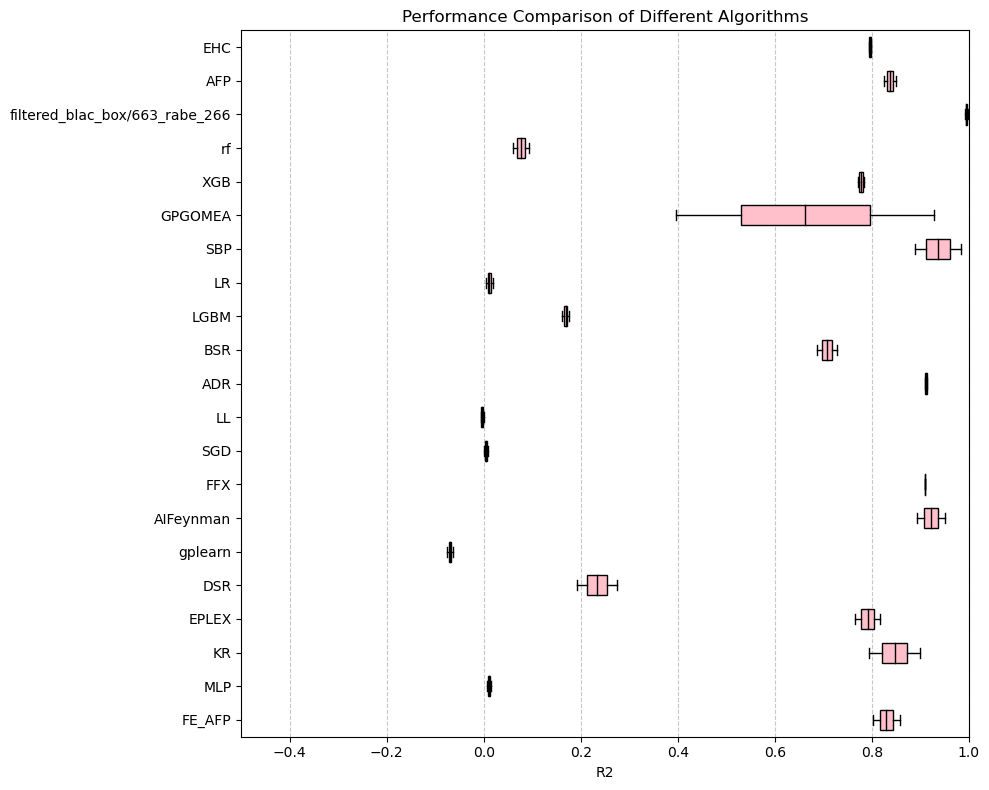

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the box plot
ax.boxplot(data_r2.values(),
           vert=False,
           labels=data_r2.keys(),
           widths=0.6,
           patch_artist=True,
           medianprops={'color': 'black'},
           boxprops={'facecolor': 'pink', 'edgecolor': 'black'},
           whiskerprops={'color': 'black'},
           capprops={'color': 'black'})

# Customize the plot
ax.set_xlabel('R2')
ax.set_xlim(-0.5, 1)
ax.set_title('Performance Comparison of Different Algorithms')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Reverse the y-axis to match the original image
ax.invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

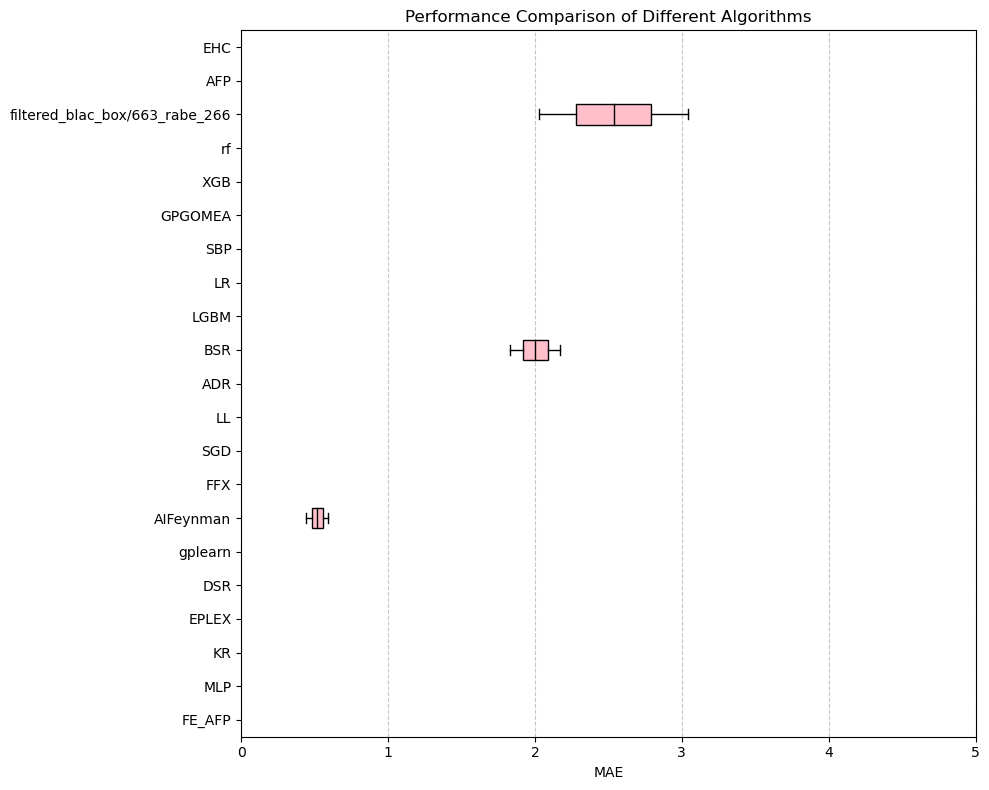

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the box plot
ax.boxplot(data_mae.values(),
           vert=False,
           labels=data_mae.keys(),
           widths=0.6,
           patch_artist=True,
           medianprops={'color': 'black'},
           boxprops={'facecolor': 'pink', 'edgecolor': 'black'},
           whiskerprops={'color': 'black'},
           capprops={'color': 'black'})

# Customize the plot
ax.set_xlabel('MAE')
ax.set_xlim(0, 5)
ax.set_title('Performance Comparison of Different Algorithms')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Reverse the y-axis to match the original image
ax.invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

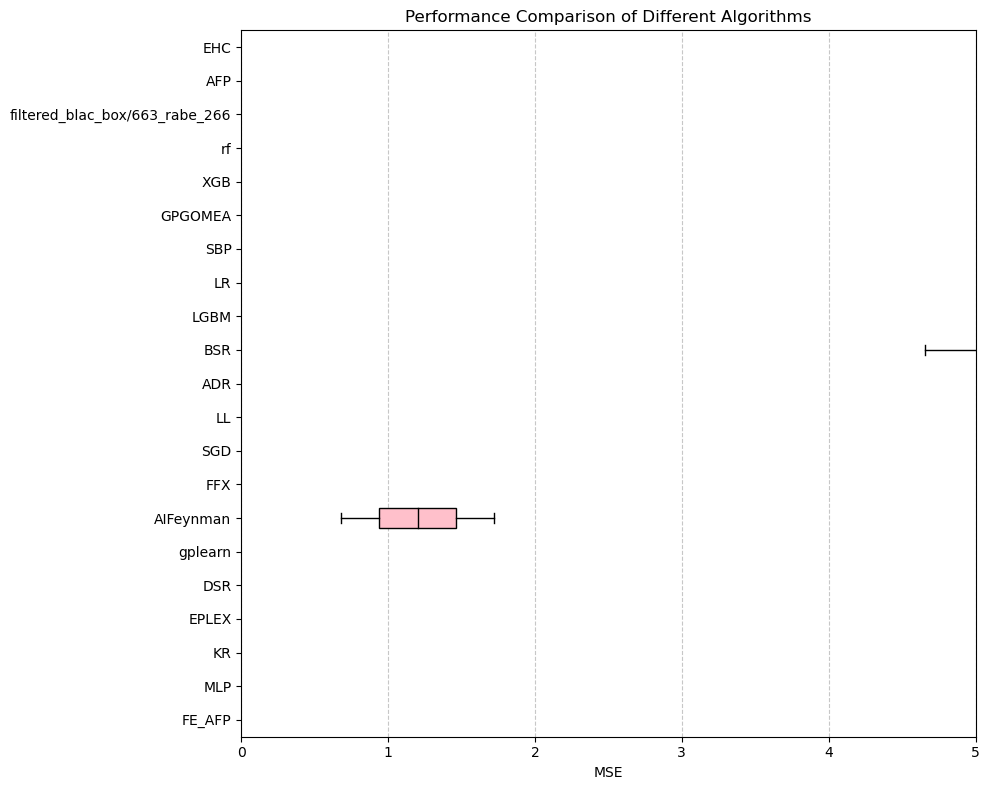

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Create the box plot
ax.boxplot(data_mse.values(),
           vert=False,
           labels=data_mse.keys(),
           widths=0.6,
           patch_artist=True,
           medianprops={'color': 'black'},
           boxprops={'facecolor': 'pink', 'edgecolor': 'black'},
           whiskerprops={'color': 'black'},
           capprops={'color': 'black'})

# Customize the plot
ax.set_xlabel('MSE')
ax.set_xlim(0, 5)
ax.set_title('Performance Comparison of Different Algorithms')
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Reverse the y-axis to match the original image
ax.invert_yaxis()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()